In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb
from numpy.polynomial.hermite import hermgauss

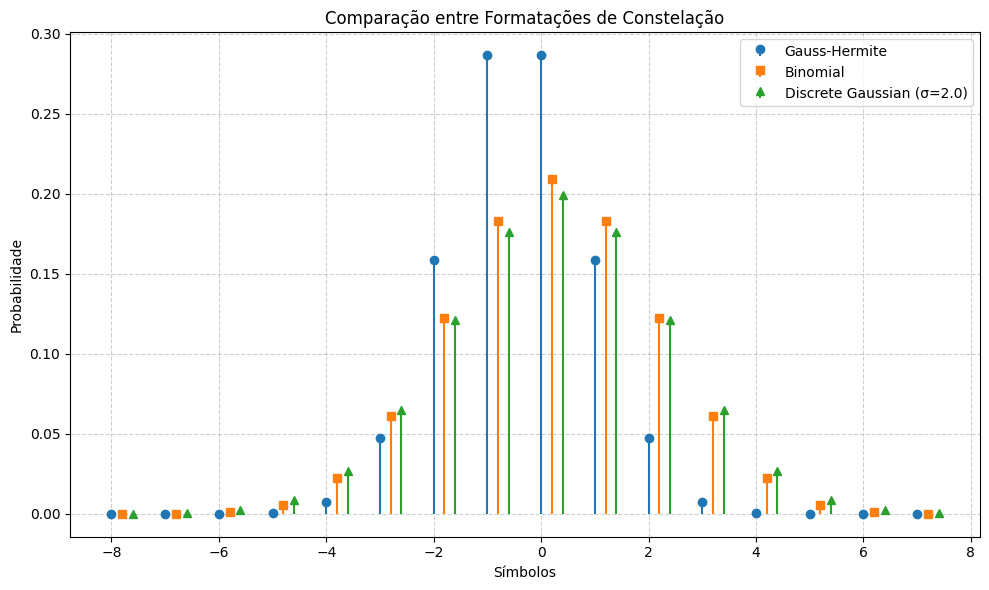

In [2]:
# Número de símbolos (ímpar, centrado em zero)
M = 15
symbols = np.arange(-M//2, M//2 + 1)

# === 1. Gauss-Hermite ===
# Ajusta o número de pontos para corresponder ao número de símbolos
def gauss_hermite_pmf(n_symbols):
    x, w = hermgauss(n_symbols)
    w = w / np.sum(w)
    # Normaliza símbolos para ter mesmo suporte
    x_scaled = np.linspace(symbols[0], symbols[-1], n_symbols)
    return x_scaled, w

gh_x, gh_pmf = gauss_hermite_pmf(len(symbols))

# === 2. Binomial ===
def binomial_pmf(symbols):
    n = (len(symbols) - 1) // 2
    pmf = np.array([comb(2*n, n + s) for s in symbols]) / 2**(2*n)
    return pmf

binom_pmf = binomial_pmf(symbols)

# === 3. Gaussiana Discreta ===
def discrete_gaussian_pmf(symbols, sigma):
    probs = np.exp(-symbols**2 / (2 * sigma**2))
    return probs / np.sum(probs)

sigma = 2.0
gauss_pmf = discrete_gaussian_pmf(symbols, sigma)

# === Plot ===
plt.figure(figsize=(10, 6))
plt.stem(gh_x, gh_pmf, linefmt='C0-', markerfmt='C0o', basefmt=' ', label='Gauss-Hermite')
plt.stem(symbols + 0.2, binom_pmf, linefmt='C1-', markerfmt='C1s', basefmt=' ', label='Binomial')
plt.stem(symbols + 0.4, gauss_pmf, linefmt='C2-', markerfmt='C2^', basefmt=' ', label=f'Discrete Gaussian (σ={sigma})')

plt.xlabel('Símbolos')
plt.ylabel('Probabilidade')
plt.title('Comparação entre Formatações de Constelação')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()
